In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [32]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [33]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [34]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [35]:
gold_data.shape

(2290, 6)

In [36]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [37]:
gold_data.isnull().sum() #missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [38]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [39]:
correlation = gold_data.corr()

<ipython-input-39-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

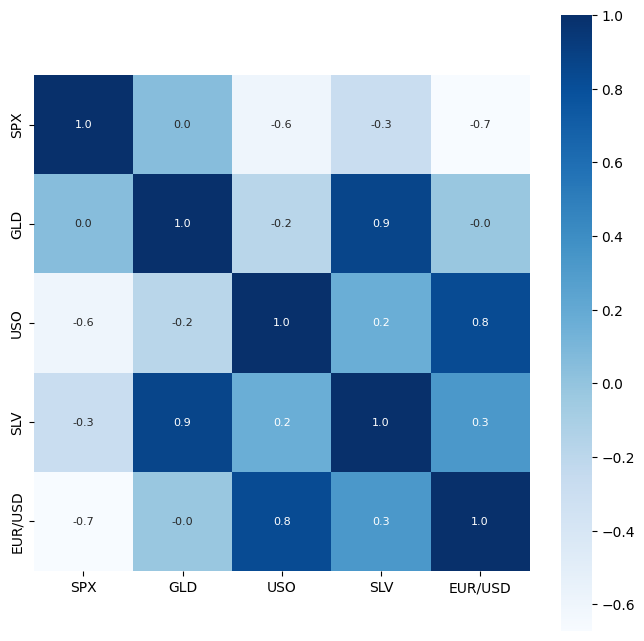

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True , fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [41]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-42-e8c9bdd0190c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='Blue')


<Axes: xlabel='GLD', ylabel='Density'>

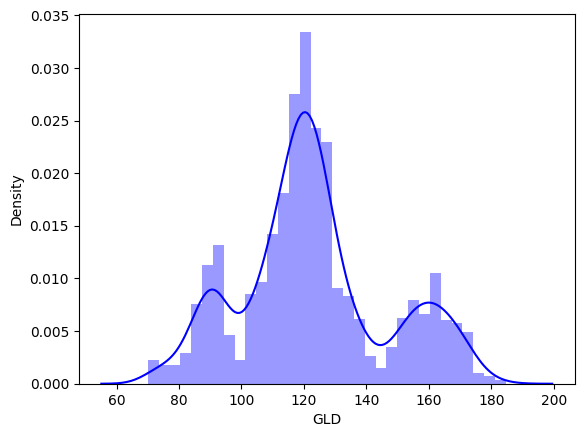

In [42]:
sns.distplot(gold_data['GLD'],color='Blue')

In [43]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [44]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [46]:
regressor = RandomForestRegressor(n_estimators=100)


In [47]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [48]:
test_data_prediction = regressor.predict(X_test)

In [49]:
print(test_data_prediction)

[168.65669952  82.15099974 115.90010025 127.74370084 120.88790112
 154.70489727 149.96489776 126.04580015 117.4526987  125.91510105
 116.5827008  172.40470094 141.17889834 167.96179824 115.33630024
 117.70040052 138.75680339 169.98920039 159.43540322 159.84449883
 155.14090015 125.30750034 175.97669978 156.94130356 125.35340045
  93.81569956  76.4157004  120.48599996 119.0556987  167.40539952
  88.23260088 125.1985002   91.11630081 117.71380032 121.08949895
 137.16480105 115.67100125 115.02180058 147.0719994  106.85580117
 104.46680264  87.15899782 126.49000002 117.88359967 152.40559937
 119.58460015 108.41830021 108.21849819  93.07490058 127.01159818
  75.10870042 113.60849908 121.09960023 111.30809908 118.9140988
 120.8544994  159.42189938 167.75170164 147.08019697  85.68059816
  94.22320037  86.7340985   90.36910004 119.15220026 126.37520054
 127.53569979 169.79889961 122.12489983 117.38959883  98.60440007
 168.13770189 143.47109838 132.22160263 121.18920209 121.8143993
 119.7934004

In [50]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ",error_score*100,'%')

R squared error :  98.96207983741527 %


In [51]:
from sklearn.metrics import accuracy_score,classification_report

In [52]:
Y_test = list(Y_test)

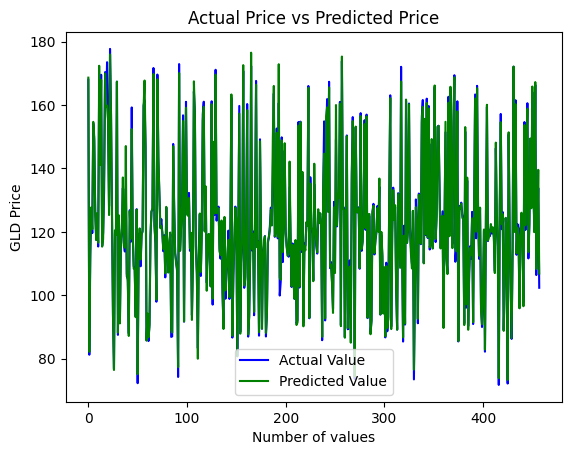

In [53]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [54]:
# Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linear_reg = LinearRegression()
linear_reg.fit(X_test,Y_test)
predicted_is = linear_reg.predict(X_test)

linear_score = metrics.r2_score(Y_test, predicted_is)
print("R squared error: ",linear_score*100,'%')

R squared error:  86.80496893303666 %


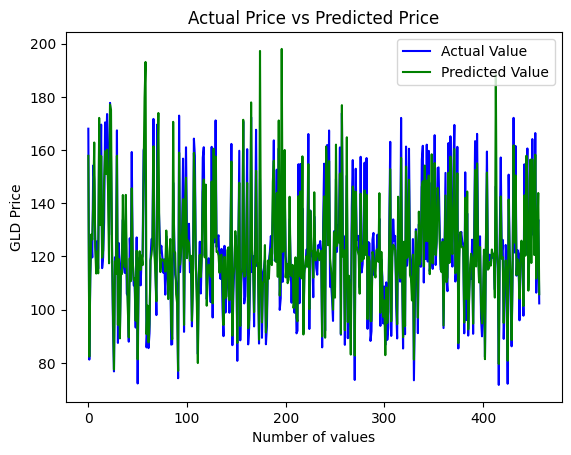

In [57]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(predicted_is, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, Y_train)
gb_pred = gb_regressor.predict(X_test)

gb_score = metrics.r2_score(Y_test,gb_pred)
print("R squared value is :",gb_score*100,'%')

R squared value is : 97.6494107154658 %


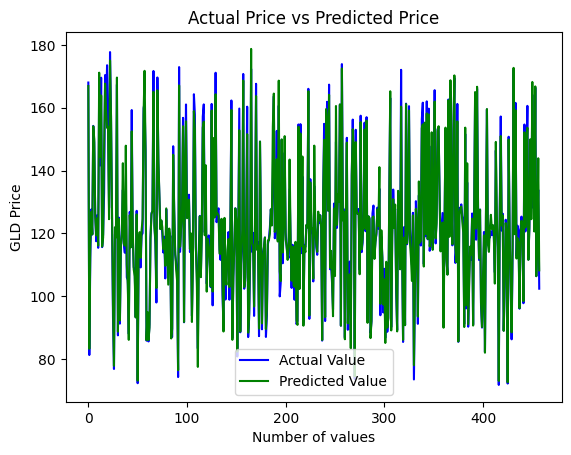

In [59]:
variable_name = "" # @param {type:"string"}
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(gb_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()